In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
#import tensorboard
from keras.preprocessing.image import random_rotation, random_shear, random_shift, random_zoom


mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(train_labels[0])
plt.imshow(train_images[0], cmap="Greys_r")


print(np.shape(train_images),
np.shape(test_images),
np.shape(train_labels),
np.shape(test_labels))


Using TensorFlow backend.


9
(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


In [3]:
tuple_inputsize = (28, 28, 1)
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)


################################################################################
# Build the model
################################################################################


layer_list = [tf.keras.layers.Convolution2D(filters = 32, kernel_size = (3, 3),
                               padding = 'same',input_shape = tuple_inputsize,
                               kernel_initializer = 
                               tf.initializers.RandomNormal(mean = 0.0,
                                stddev = 0.05, seed = None),
                             bias_initializer=tf.initializers.constant(0.001)),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
    tf.keras.layers.Convolution2D(filters = 28 , kernel_size = (3, 3),
                               padding = 'same',input_shape = tuple_inputsize,
                               kernel_initializer = 
                               tf.initializers.RandomNormal(mean = 0.0,
                                stddev = 0.05, seed = None),
                             bias_initializer=tf.initializers.constant(0.001)),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2)), 
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)]

model = tf.keras.Sequential(layer_list)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
              
model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 28)        8092      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 28)          0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 28)                0         
_________________________________________________________________
dense (Dense)                (None, 10)                290       
Total params: 8,702
Trainable params: 8,702
Non-trainable params: 0
______________________________________________________

In [4]:
train_images = train_images/255.0
test_images = test_images/255.0

In [5]:
################################################################################
# Train the model
################################################################################
early_stop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5, verbose=1)
                                            
history = model.fit(train_images, train_labels, epochs=40, verbose=1, validation_data=(test_images, test_labels), callbacks=[early_stop]) 

Train on 60000 samples, validate on 10000 samples
Epoch 1/40
60000/60000 [==============================] - 36s 605us/sample - loss: 1.2569 - accuracy: 0.5612 - val_loss: 0.9234 - val_accuracy: 0.6833
Epoch 2/40
60000/60000 [==============================] - 37s 616us/sample - loss: 0.8145 - accuracy: 0.7171 - val_loss: 0.7613 - val_accuracy: 0.7418
Epoch 3/40
60000/60000 [==============================] - 43s 721us/sample - loss: 0.7343 - accuracy: 0.7443 - val_loss: 0.7060 - val_accuracy: 0.7551
Epoch 4/40
60000/60000 [==============================] - 41s 689us/sample - loss: 0.6884 - accuracy: 0.7600 - val_loss: 0.6624 - val_accuracy: 0.7690
Epoch 5/40
60000/60000 [==============================] - 43s 712us/sample - loss: 0.6570 - accuracy: 0.7694 - val_loss: 0.6507 - val_accuracy: 0.7707
Epoch 6/40
60000/60000 [==============================] - 43s 713us/sample - loss: 0.6333 - accuracy: 0.7769 - val_loss: 0.6313 - val_accuracy: 0.7796
Epoch 7/40
60000/60000 [====================

In [6]:
import pandas as pd
classes=np.arange(0, 10, 1)
y_pred=model.predict_classes(test_images)
con_mat = tf.math.confusion_matrix(labels=test_labels, predictions=y_pred).numpy()

con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
 
con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes, 
                     columns = classes)

Instructions for updating:
Use `tf.cast` instead.
Instructions for updating:
Use `tf.cast` instead.


In [7]:
print(con_mat)

[[767   1  13  38   9   1 158   2  11   0]
 [  1 957   2  23  10   0   7   0   0   0]
 [ 19   2 659  12  99   0 202   0   7   0]
 [ 36  12   7 848  37   0  55   0   5   0]
 [  4   5  75  43 664   0 207   0   2   0]
 [  0   0   0   2   0 901   0  78  13   6]
 [111   3  51  29  61   0 729   0  16   0]
 [  0   0   0   0   0  13   0 973   2  12]
 [  5   1   3   5  10   5  21   4 943   3]
 [  4   1   0   3   3  24   0  90   7 868]]


In [8]:
class_labels = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

Visualizing Class Activation Maps of first 10 Test Images
Visualizing Class Activation Maps of 1st Test Image


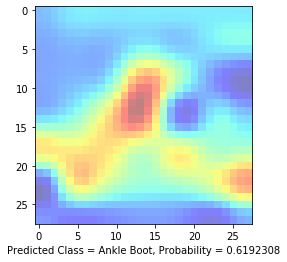

Visualizing Class Activation Maps of 2st Test Image


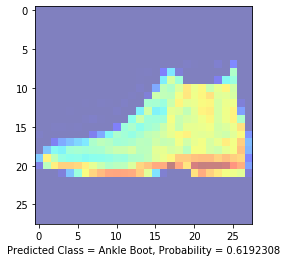

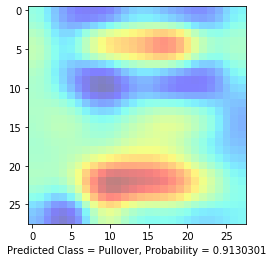

Visualizing Class Activation Maps of 3st Test Image


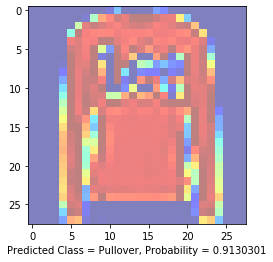

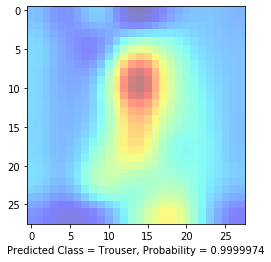

Visualizing Class Activation Maps of 4st Test Image


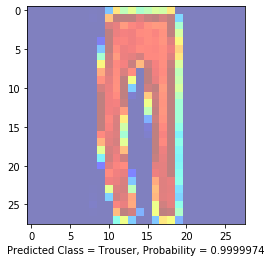

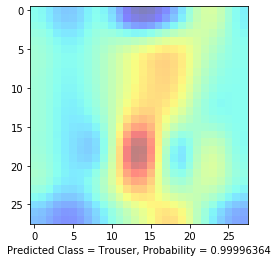

Visualizing Class Activation Maps of 5st Test Image


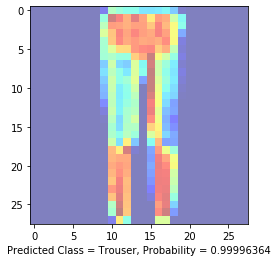

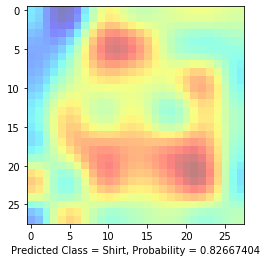

Visualizing Class Activation Maps of 6st Test Image


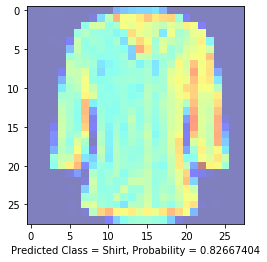

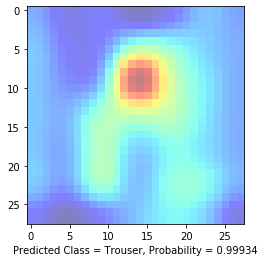

Visualizing Class Activation Maps of 7st Test Image


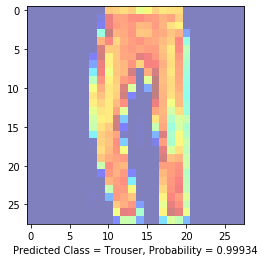

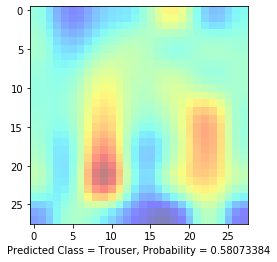

Visualizing Class Activation Maps of 8st Test Image


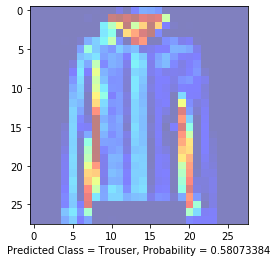

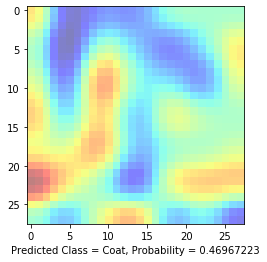

Visualizing Class Activation Maps of 9st Test Image


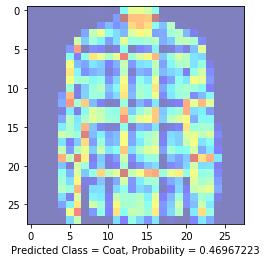

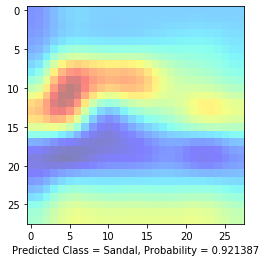

Visualizing Class Activation Maps of 10st Test Image


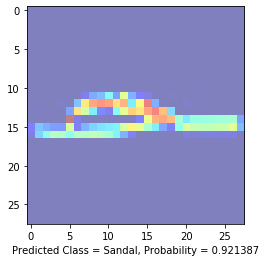

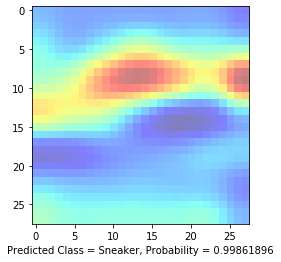

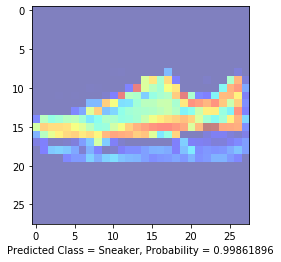

In [16]:
# import Numpy, Scipy, and Matplotlib
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt


# get the weights from the last layer
gap_weights = model.layers[-1].get_weights()[0]

# create a new model to output the feature maps and the predicted labels
cam_model = tf.keras.models.Model(inputs=model.input, 
                    outputs=(model.layers[-3].output, model.layers[-1].output)) 

# make the prediction for a set of test images
features, results = cam_model.predict(test_images)

print('Visualizing Class Activation Maps of first 10 Test Images')

# check the prediction for 10 test images
for idx in range(10):   
    # get the feature map of the test image
    features_for_one_img = features[idx, :, :, :]

    # map the feature map to the original size
    height_roomout = 28 / features_for_one_img.shape[0] # 28 = height of image
    width_roomout = 28 / features_for_one_img.shape[1]  # 28 = width of image
    cam_features = sp.ndimage.zoom(features_for_one_img, (height_roomout, width_roomout, 1), order=2)
        
    # get the predicted label with the maximum probability
    pred = np.argmax(results[idx])
    
    # prepare the final display
    plt.figure(facecolor='white')
    
    # get the weights of class activation map
    cam_weights = gap_weights[:, pred]

    # create the class activation map
    cam_output = np.dot(cam_features, cam_weights)
    
    # draw the class activation map
    #ax.set_xticklabels([])
    #ax.set_yticklabels([])
    
    print('Visualizing Class Activation Maps of ' + str(idx + 1) + 'st Test Image')
    present_class = class_labels[y_pred[idx]]
    buf = 'Predicted Class = ' + present_class + ', Probability = ' + str(results[idx][pred])
    plt.xlabel(buf)
    #plt.imshow(t_pic[idx], alpha=0.5)
    plt.imshow(cam_output, cmap='jet', alpha=0.5)
     
    plt.show()
    test_images_show = np.reshape(test_images[idx], (28, 28))*255.0
    plt.xlabel(buf)
    plt.imshow(test_images_show, cmap='jet', alpha=0.5)
    
    